<a href="https://colab.research.google.com/github/AllerLydia/Deep-Learning/blob/master/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas

In [ ]:
from torch import nn
import matplotlib.pyplot as plt
import torch

In [58]:
# preparing and loading data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [59]:
# create train / test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [60]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [61]:
def plot_prediction(train_data = X_train, 
                    train_labels=y_train, 
                    test_data = X_test, 
                    test_labels=y_test, 
                    predictions = None):
  """
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label="Preidctions")
  
  plt.legend(prop={"size":4})

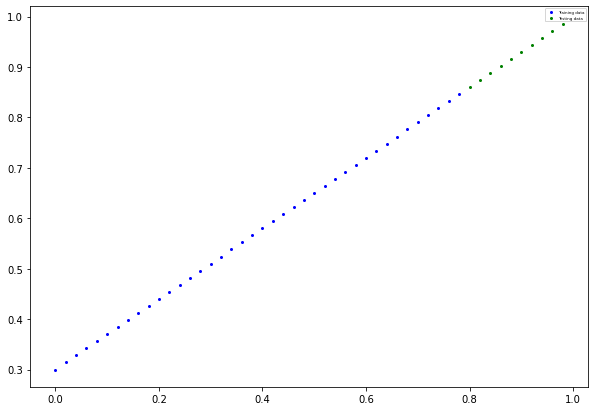

In [ ]:
plot_prediction();

In [ ]:
# pytorch model

In [ ]:
class LinearRegaressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float))
    
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

model_0 = LinearRegaressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(random_seed)
torch.randn(1)

tensor([0.3367])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

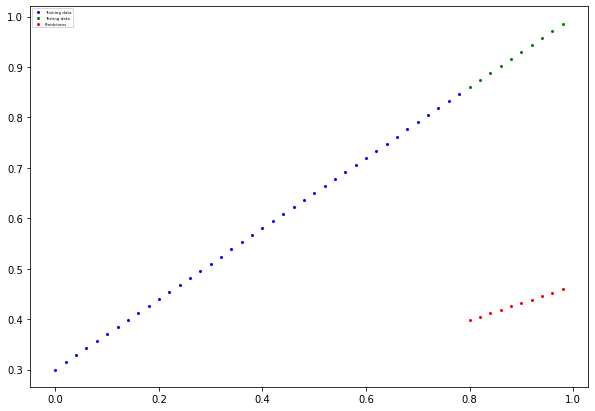

In [ ]:
plot_prediction(predictions = y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  # print(f"loss: {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")
    print(f"parameters: {model_0.state_dict()}")


Epoch: 0 | Loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
parameters: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test_loss: 0.3463551998138428
parameters: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test_loss: 0.21729660034179688
parameters: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test_loss: 0.14464017748832703
parameters: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test_loss: 0.11360953003168106
parameters: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test_loss: 0.09919948130846024
parameters: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test_loss: 0.0888663306832

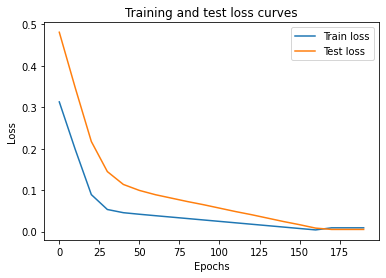

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

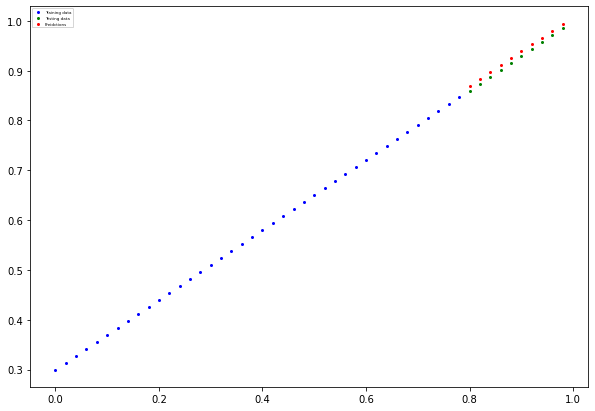

In [ ]:
plot_prediction(predictions = y_pred_new)

In [ ]:
# save model in PyTorch

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
torch.save(model_0.state_dict(),f = MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegaressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [31]:
device

'cpu'

In [48]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias


In [33]:
x.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [34]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]

In [35]:
x_test, y_test = x[train_split:], y[train_split:]

In [36]:
x_test.shape, x_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

In [37]:
#model 
class LinearRegrssionModel02(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [50]:
torch.manual_seed = 42
model_1 = LinearRegrssionModel02()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5461]])),
             ('linear_layer.bias', tensor([0.9662]))])

In [51]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.01)


In [52]:
epochs = 200

# put data into same device

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(x_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss;: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss;: 0.6061414480209351 | Test loss: 0.5157362818717957
Epoch: 10 | Loss;: 0.49093160033226013 | Test loss: 0.3810264766216278
Epoch: 20 | Loss;: 0.3757217228412628 | Test loss: 0.24631664156913757
Epoch: 30 | Loss;: 0.2605118751525879 | Test loss: 0.11160681396722794
Epoch: 40 | Loss;: 0.14530201256275177 | Test loss: 0.024130214005708694
Epoch: 50 | Loss;: 0.0802607387304306 | Test loss: 0.10969414561986923
Epoch: 60 | Loss;: 0.06870216131210327 | Test loss: 0.1354253739118576
Epoch: 70 | Loss;: 0.06396154314279556 | Test loss: 0.14105120301246643
Epoch: 80 | Loss;: 0.06038028001785278 | Test loss: 0.1368999481201172
Epoch: 90 | Loss;: 0.05686132237315178 | Test loss: 0.13206180930137634
Epoch: 100 | Loss;: 0.05342372506856918 | Test loss: 0.12447617202997208
Epoch: 110 | Loss;: 0.0499952957034111 | Test loss: 0.11620362102985382
Epoch: 120 | Loss;: 0.046557702124118805 | Test loss: 0.10793106257915497
Epoch: 130 | Loss;: 0.04312180355191231 | Test loss: 0.10034541040658

In [53]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6050]])),
             ('linear_layer.bias', tensor([0.3397]))])

In [54]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(x_test)

y_preds

tensor([[0.8236],
        [0.8357],
        [0.8478],
        [0.8599],
        [0.8720],
        [0.8841],
        [0.8962],
        [0.9083],
        [0.9204],
        [0.9325]])

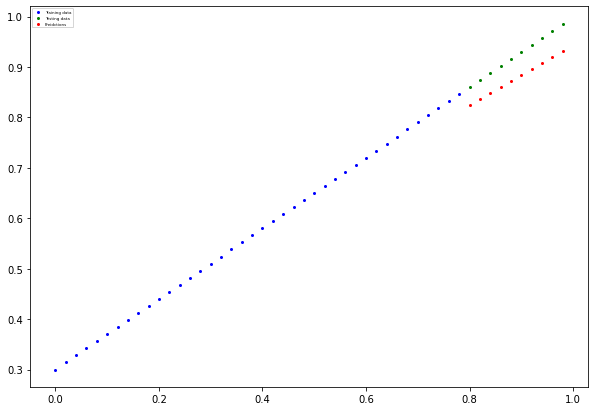

In [63]:
plot_prediction(predictions = y_preds)

In [66]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

In [68]:
loaded_model_1 = LinearRegrssionModel02()
loaded_model_1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [70]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6050]])),
             ('linear_layer.bias', tensor([0.3397]))])